### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore") # ignore warnings

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


In [9]:
from imblearn.over_sampling import SMOTE

### READ AND EXPLORE THE DATASET

In [10]:
income = pd.read_csv("incomeData.csv.xls")

In [12]:
income

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [13]:
income_cpy = income.copy()

This dataset contains information from the U.S. Census regarding various demographic and socioeconomic factors of individuals. The primary focus is on predicting whether an individual earns more than $50,000 per year based on features such as age, education, occupation, and more.



In [14]:
print("The number of rows and columns: ",income.shape)
print("The total number of elements in the dataset: ",income.size)

The number of rows and columns:  (32561, 15)
The total number of elements in the dataset:  488415


In [15]:
print("COLUMN NAMES: \n",income.columns)

COLUMN NAMES: 
 Index(['nan', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')


### RENAMING THE COLUMN NAMES

In [16]:
income.rename(columns={'nan':'Age','workclass':'Workclass','fnlwgt':'Final_Weight',
                   'education':'Education', 'education-num':'Education_Num','marital-status': 'Marital_Status',
                   'occupation':'Occupation', 'relationship':'Relationship','race': 'Race','sex':'Sex',
                   'capital-gain':'Capital_Gain', 'capital-loss':'Capital_Loss', 
                   'hours-per-week':'Hours_Per_Week','native-country':'Native_Country','Income':'Income'
                  },inplace=True)

In [17]:
income.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [18]:
# column names are renamed now.

The data contains 32561 instances with the following attributes:

Features:

- Age: Represents the age of the individual.
- Workclass: Describes the type of employment or work class the individual is associated with (e.g., State government, Self-employed, Private).
- Final Weight (fnlwgt): This is a census-specific weight. It represents the number of people the census believes the entry represents.
- Education: Indicates the highest level of education achieved by the individual (e.g., Bachelors, HS-grad, Assoc-acdm).
- Education Number (education-num): Corresponds to the education level in numerical form.
- Marital Status: Specifies the marital status of the individual (e.g., Never-married, Married-civ-spouse, Divorced).
- Occupation: Refers to the type of work or job the individual is engaged in (e.g., Adm-clerical, Exec-managerial, Handlers-cleaners).
- Relationship: Indicates the person's role in the family (e.g., Not-in-family, Husband, Wife, Own-child).
- Race: Represents the racial background of the individual (e.g., White, Black).
- Sex: Specifies the gender of the individual (Male or Female).
- Capital Gain: Refers to the monetary gain made by the individual through investments or other financial activities.
- Capital Loss: Indicates the monetary loss suffered by the individual through investments or other financial activities.
- Hours per Week: Represents the number of hours the individual works per week.
- Native Country: Specifies the native country of the individual.
- Income: Indicates whether the individual's income is above or below $50,000 (<=50K or >50K).

In [19]:
income.dtypes

Age                int64
Workclass         object
Final_Weight       int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income            object
dtype: object

In [20]:
# dtypes present here are int64 and object

In [21]:
print("The number of missing values: \n",income.isna().sum())
print("\n")
print("The number of duplicates: ",income.duplicated().any())

The number of missing values: 
 Age               0
Workclass         0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64


The number of duplicates:  True


In [22]:
# the dataset doesn't contain missing values
# the dataset contains some duplicates

In [23]:
income.duplicated().sum() # there are 24 duplicate values

24

In [24]:
# checking duplicates in the corresponding columns

In [25]:
duplicates = income[income.duplicated()]
duplicates

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [26]:
income = income.drop_duplicates()

In [27]:
income.duplicated().sum() 

0

In [28]:
# now there is no duplicates

In [29]:
print("number of unique value:\n",income.nunique())

number of unique value:
 Age                  73
Workclass             9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_Per_Week       94
Native_Country       42
Income                2
dtype: int64


### CHECKING UNIQUE'S OF EACH COLUMN

In [30]:
income["Age"].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [31]:
income["Workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

- State-gov: Individuals employed by the state government.
- Self-emp-not-inc: Self-employed individuals who are not incorporated.
- Private: Individuals employed in the private sector.
- Federal-gov: Individuals employed by the federal government.
- Local-gov: Individuals employed by local government.
- Self-emp-inc: Self-employed individuals who are incorporated.
- Without-pay: Individuals without pay, possibly volunteers or unpaid workers.
- Never-worked: Individuals who have never worked.

In [32]:
income["Final_Weight"].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [33]:
income["Education"].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

- Bachelors: Bachelor's degree.
- HS-grad: High School graduate.
- 11th: 11th grade.
- Masters: Master's degree.
- 9th: 9th grade.
- Some-college: Some college education, but no degree specified.
- Assoc-acdm: Associate degree in a specific field like accounting or marketing.
- Assoc-voc: Associate degree in a vocational field.
- 7th-8th: 7th or 8th grade.
- Doctorate: Doctorate or Ph.D.
- Prof-school: Professional school degree (beyond a bachelor's but not a doctorate).
- 5th-6th: 5th or 6th grade.
- 10th: 10th grade.
- 1st-4th: 1st through 4th grade.
- Preschool: Preschool education.
- 12th: 12th grade.

In [34]:
income["Education_Num"].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

It represents education levels in numerical form.
- 1: Preschool
- 2: 1st-4th
- 3: 5th-6th
- 4: 7th-8th
- 5: 9th
- 6: 10th
- 7: 11th
- 8: 12th
- 9: HS-grad
- 10: Some-college
- 11: Assoc-voc
- 12: Assoc-acdm
- 13: Bachelors
- 14: Masters
- 15: Prof-school
- 16: Doctorate

In [35]:
income["Marital_Status"].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

- Never-married: Individuals who have never been married.
- Married-civ-spouse: Married civilians living with their spouse.
- Divorced: Individuals who are divorced.
- Married-spouse-absent: Married individuals with their spouse absent, which could be due to reasons like work, travel, etc.
- Separated: Individuals who are legally separated.
- Married-AF-spouse: Married individuals where the spouse is in the Armed Forces.
- Widowed: Individuals who have lost their spouse due to death.

In [36]:
income["Occupation"].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

- Adm-clerical: Administrative and clerical roles.
- Exec-managerial: Executive and managerial positions.
- Handlers-cleaners: Jobs involving handling and cleaning tasks.
- Prof-specialty: Professional specialties or occupations requiring specialized skills and knowledge.
- Other-service: Other service-related occupations.
- Sales: Jobs related to sales.
- Craft-repair: Craft and repair occupations.
- Transport-moving: Jobs related to transportation and moving goods.
- Farming-fishing: Jobs related to farming and fishing.
- Machine-op-inspct: Machine operation and inspection jobs.
- Tech-support: Technical support roles.
- Protective-serv: Occupations related to providing protection and security services.
- Armed-Forces: Jobs in the Armed Forces.
- Priv-house-serv: Private household service jobs.

In [37]:
income["Relationship"].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

- Not-in-family: Individual is not in a family.
- Husband: Individual is a husband in a family.
- Wife: Individual is a wife in a family.
- Own-child: Individual is a biological child of the family.
- Unmarried: Individual is not married but may be in a family setting.
- Other-relative: Individual is a relative other than a husband, wife, or child.

In [38]:
income["Race"].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

- White: Individuals of White or Caucasian race.
- Black: Individuals of Black or African-American race.
- Asian-Pac-Islander: Individuals of Asian or Pacific Islander descent.
- Amer-Indian-Eskimo: Individuals of American Indian or Eskimo descent.
- Other: Other racial backgrounds that do not fall into the above categories.

In [39]:
income["Sex"].unique()

array([' Male', ' Female'], dtype=object)

In [40]:
income["Capital_Gain"].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [41]:
income["Capital_Loss"].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [42]:
income["Hours_Per_Week"].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [43]:
income["Native_Country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

from analysising unique values in each feature,it is cleared that the features "workclass",occupation,nativecountry contains the value '?',hence to remove them,
- converting into nan and 
- fill with mode(most repeated value)

In [44]:
income['Workclass'] = income['Workclass'].replace(' ?', np.nan)

In [45]:
income["Workclass"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [46]:
income['Occupation'] = income['Occupation'].replace(' ?', np.nan)

In [47]:
income['Occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [48]:
income["Native_Country"] = income["Native_Country"].replace(' ?',np.nan)

In [49]:
income["Native_Country"].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [50]:
income.isnull().sum()

Age                  0
Workclass         1836
Final_Weight         0
Education            0
Education_Num        0
Marital_Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_Gain         0
Capital_Loss         0
Hours_Per_Week       0
Native_Country     582
Income               0
dtype: int64

<Axes: >

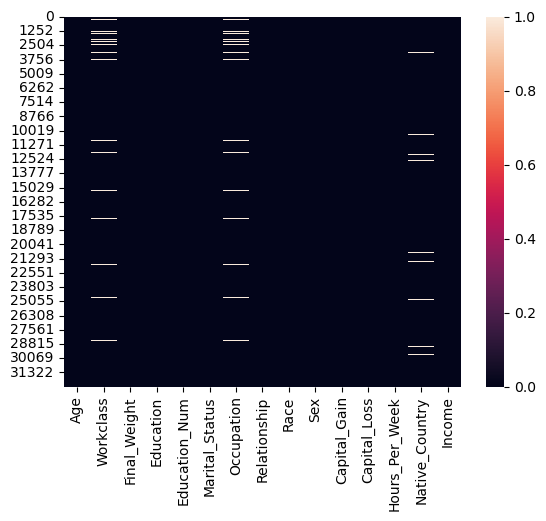

In [51]:
sns.heatmap(income.isna())

The white line represents missing values.So we can fill nan values with mode

In [52]:
income['Workclass'] = income['Workclass'].fillna(income['Workclass'].mode()[0])
income['Occupation'] = income['Occupation'].fillna(income['Occupation'].mode()[0])
income['Native_Country'] = income['Native_Country'].fillna(income['Native_Country'].mode()[0])

In [53]:
income.isnull().sum()

Age               0
Workclass         0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_Per_Week    0
Native_Country    0
Income            0
dtype: int64

In [54]:
income.sample(5)

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
24708,40,Self-emp-not-inc,177810,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,30,United-States,<=50K
21559,40,Private,144928,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
22645,27,Private,215955,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,2829,0,40,United-States,<=50K
32024,53,Private,36327,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
1806,59,Private,183606,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K


In [55]:
# now the dataframe is cleaned

In [56]:
# save cleaned data frame to new df
income.to_csv('INCOME_DATA.csv', index=False)

In [57]:
income_clean_data = pd.read_csv("INCOME_DATA.csv")
income_clean_data.head()

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### STATISTICAL DESCRIPTION

In [58]:
income.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32537.0,NaN,NaN,NaN,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
Workclass,32537,8,Private,24509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final_Weight,32537.0,NaN,NaN,NaN,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
Education,32537,16,HS-grad,10494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,32537.0,NaN,NaN,NaN,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
Marital_Status,32537,7,Married-civ-spouse,14970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32537,14,Prof-specialty,5979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32537,6,Husband,13187,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32537,5,White,27795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32537,2,Male,21775,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Take Away:
- The average age is 38 years with a minimum age of 17 and maximum age of 90.
- There are 8 unique work classes with the most frequent class is Private.
- Average finalweight is around 189778.
- There are 16 unique education level with High school graduate are most frequent.
- Average education number is for some colleges.
- The most frequent maritial status is Married Civilian spouse among 7 unique statuses.
- Prof-speciality is the most frequent Occupation among the 14 unique occupation.
- There are 6 unique relationships and Husband is the most frequent one.
- 5 unique races and most frequent is white.
- Male is the most frequent gender.
- Average capital gain is 1077.648844 with minimum 0 and maximum 99999.0.
- Average capital loss is 87.30383 with aminimum 0 and maximum 4356.0.
- Average Hours per week is 40.437456	.
- There are 41 unique countries with most frequent one is United-States.
- Income most frequent <50k

### VISUALISATION

#### UNIVARIABLE ANALYSIS

##### CATEGORICAL FEATURES

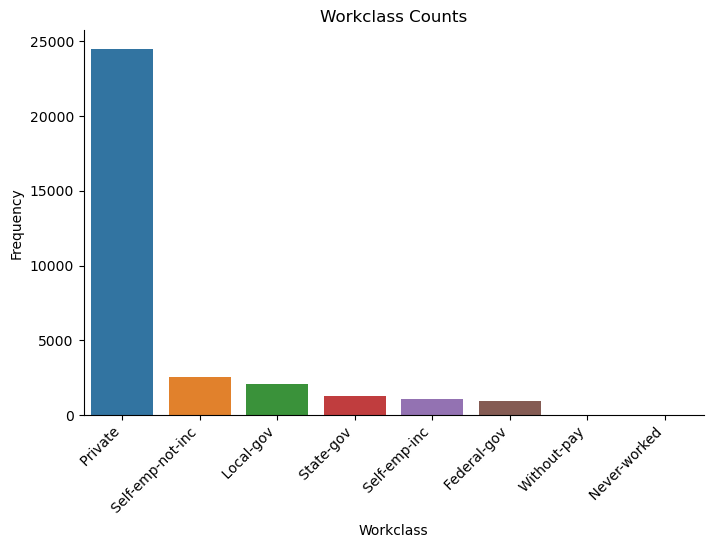

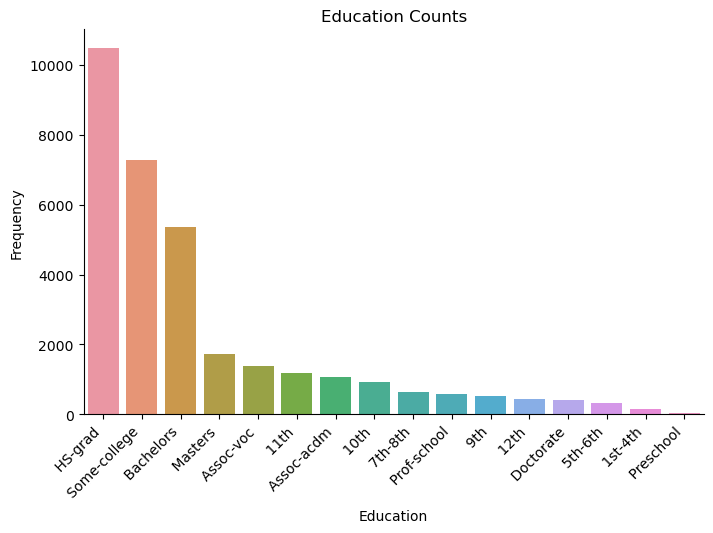

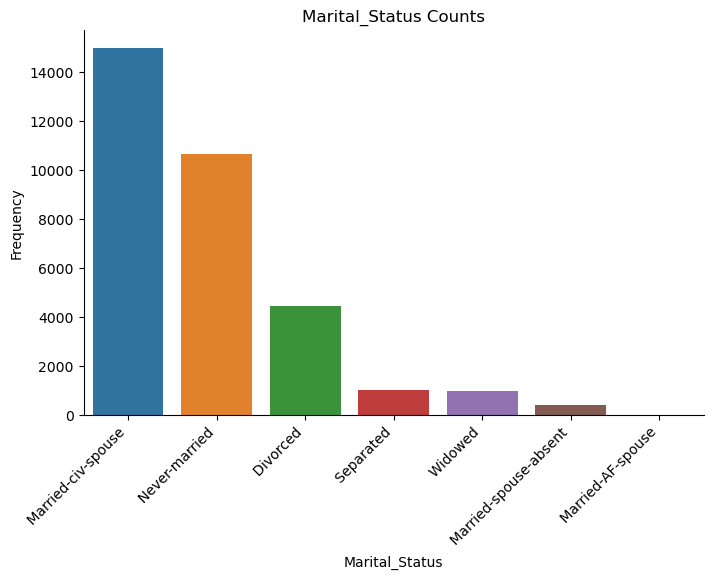

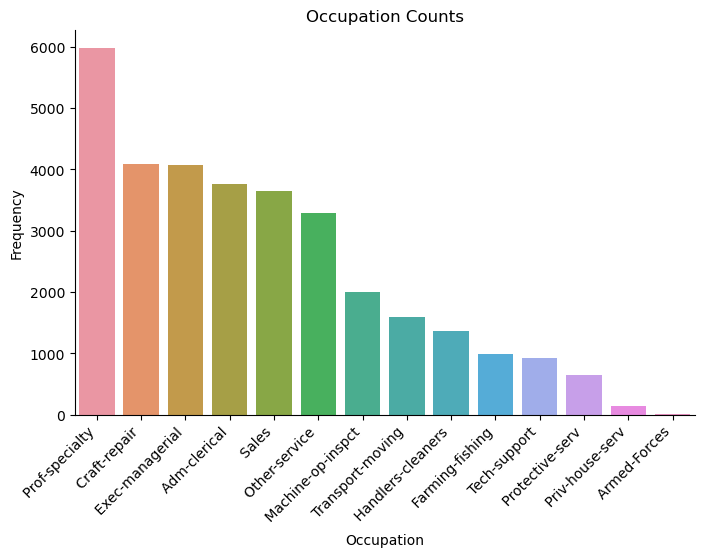

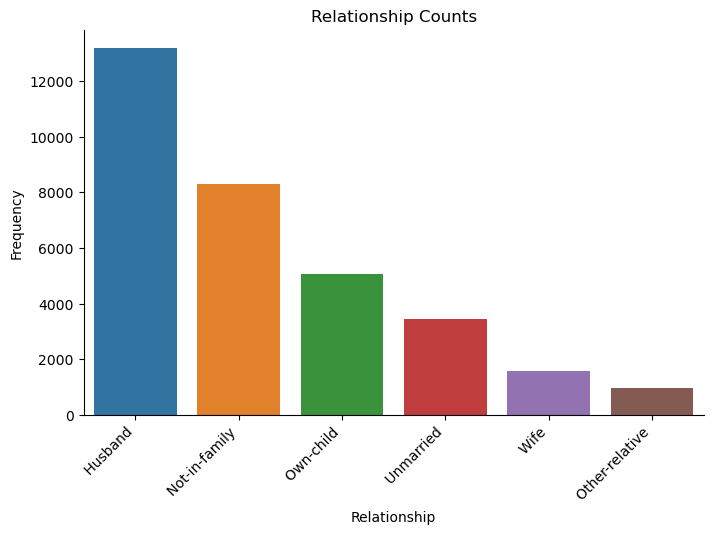

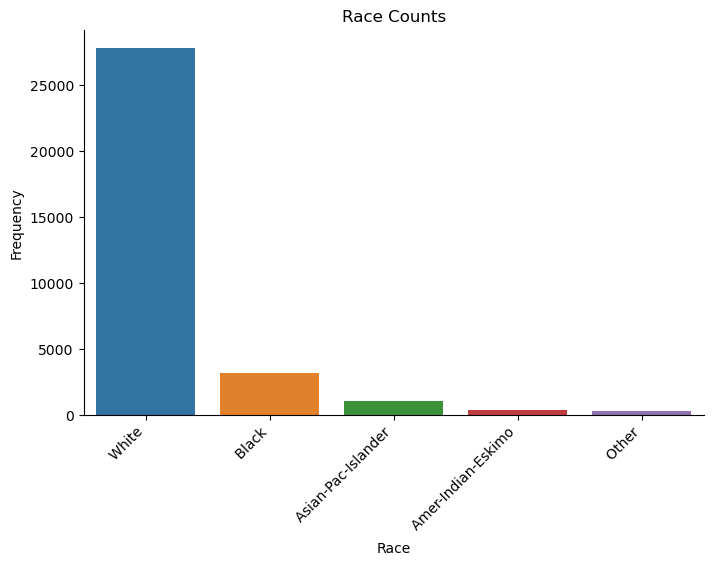

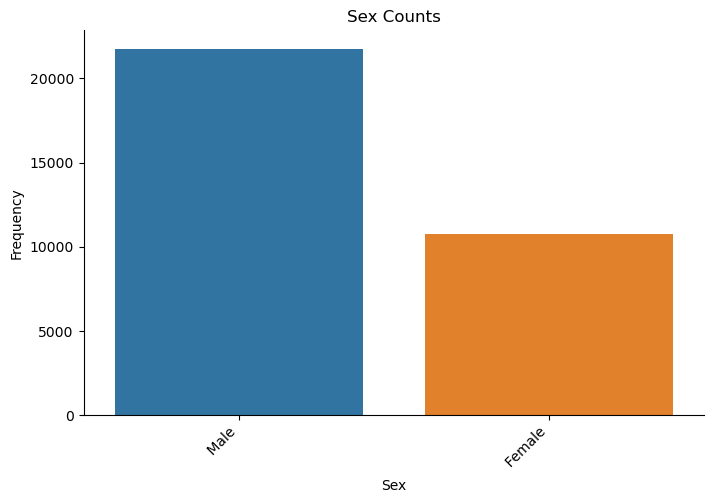

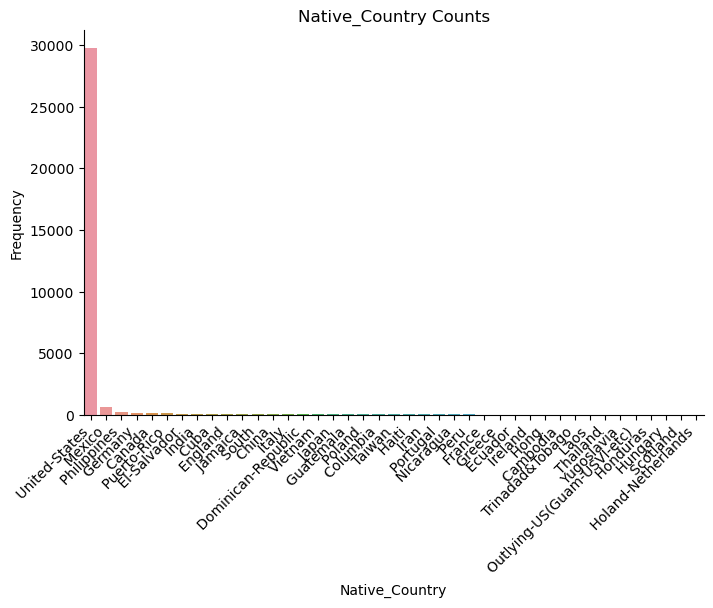

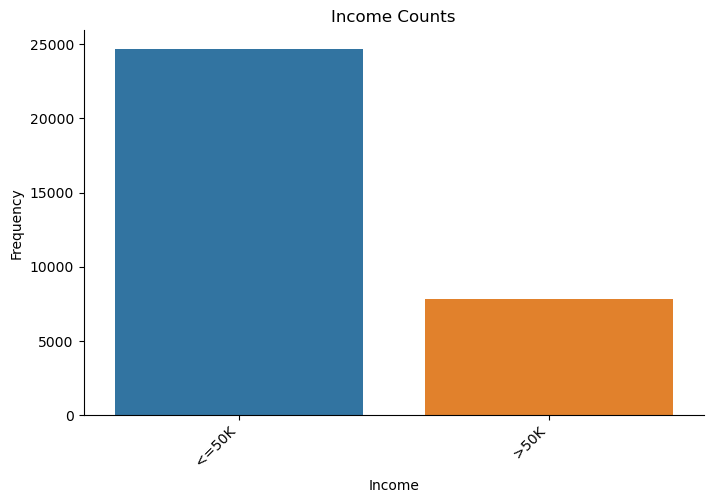

In [59]:
categorical_features = income.select_dtypes(include="object").columns
for feature in categorical_features:
    plt.figure(figsize=(8,5))
    sns.countplot(x=feature,data=income,order=income[feature].value_counts().index)
    plt.title(f'{feature} Counts')
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right') 
    sns.despine()  # remove the spines
    plt.show()


    TAKE AWAY:
        From univariate analysis of categorical features:
            - Private classes are more common, and never-worked classes are the least common.
            - The most common education is a high school degree, while the least common is a preschool education.
            - When it comes to marital status, married civilian spouses are more common than married military spouses.
            - The majority of occupations are in professional specializations, with the armed forces having at least one.
            - Husband relationships are the most common type of relationships; other relatives are less common.
            - White people are more common, whereas people of different racial backgrounds are less common.
            - There are male more than female.
            - Individuals are more from United States and less from Holand-Netherland.


##### NUMERICAL FEATURES

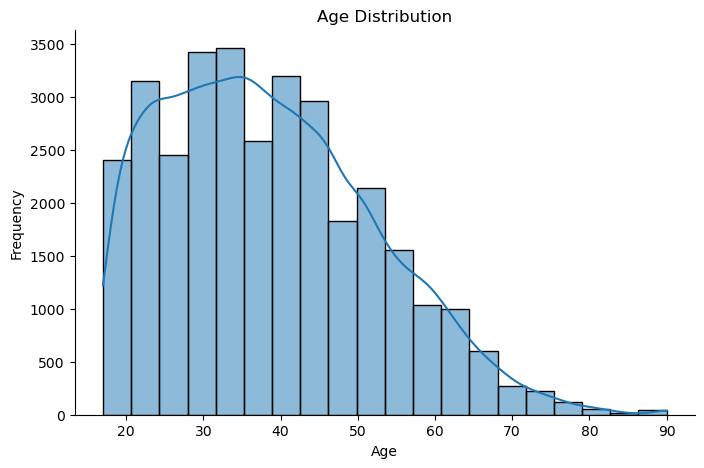

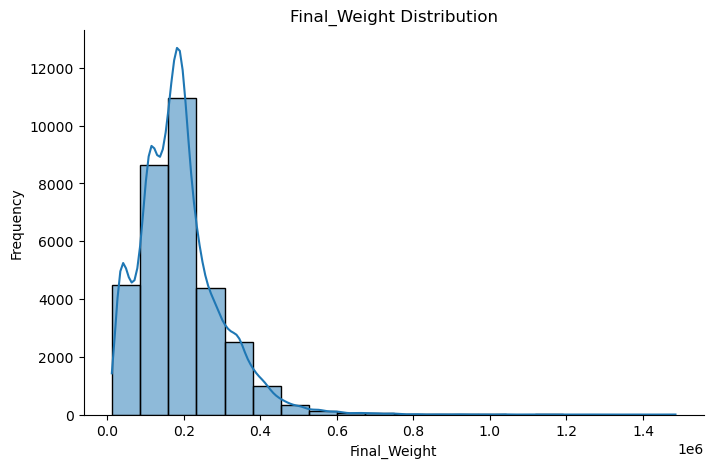

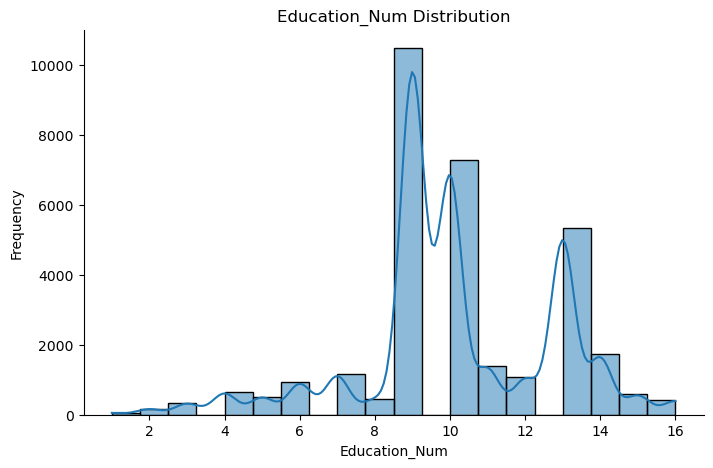

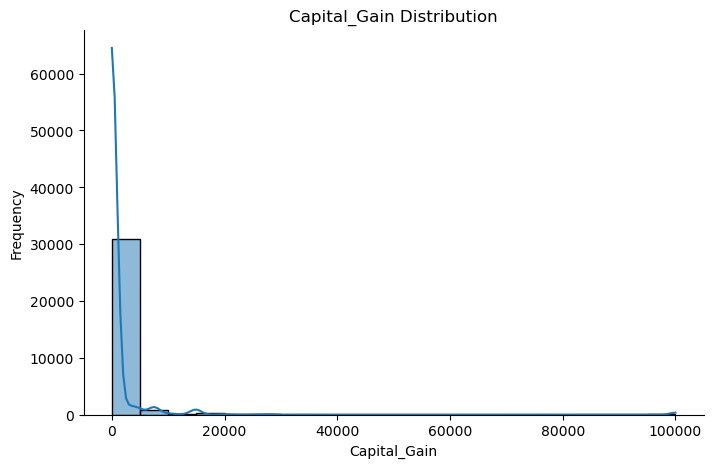

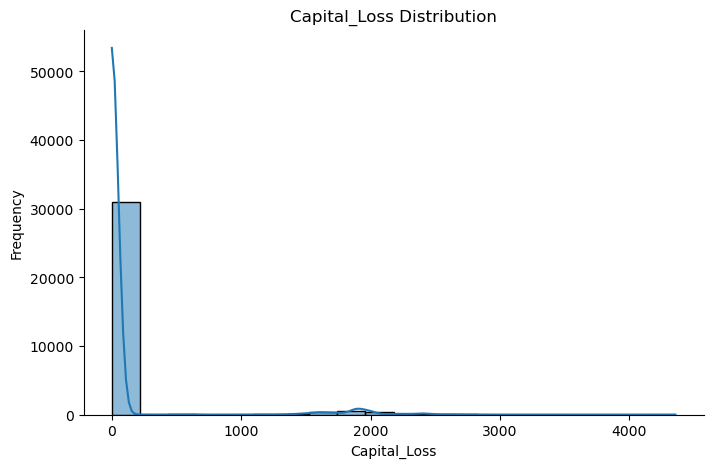

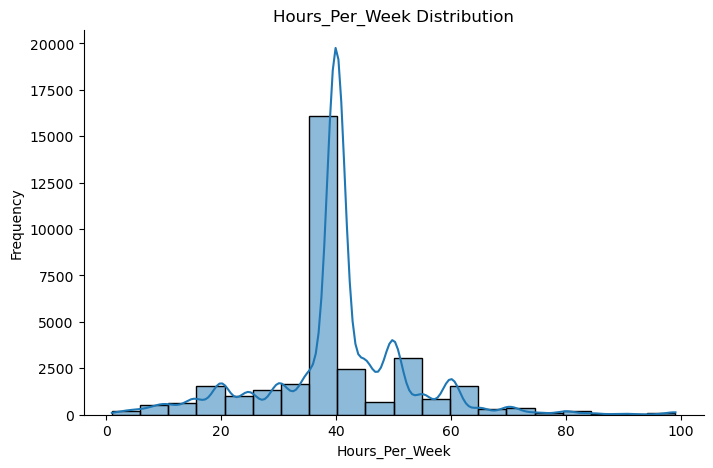

In [60]:
numerical_features = income.select_dtypes(include=['int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(income[feature], bins=20, kde=True)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    sns.despine()  # remove the spines
    plt.show()

    Take Away
        From univariable analysis of numerical data:
            - When age increases frequency decreases.
            - Education number varies and level 8th is more frequent(which is 12th grade).
            - Capital gain and Capital loss are standardised.
            - Hours per week worked by individuals is more frequent between 40-60 hours.

#### BIVARIABLE ANALYSIS

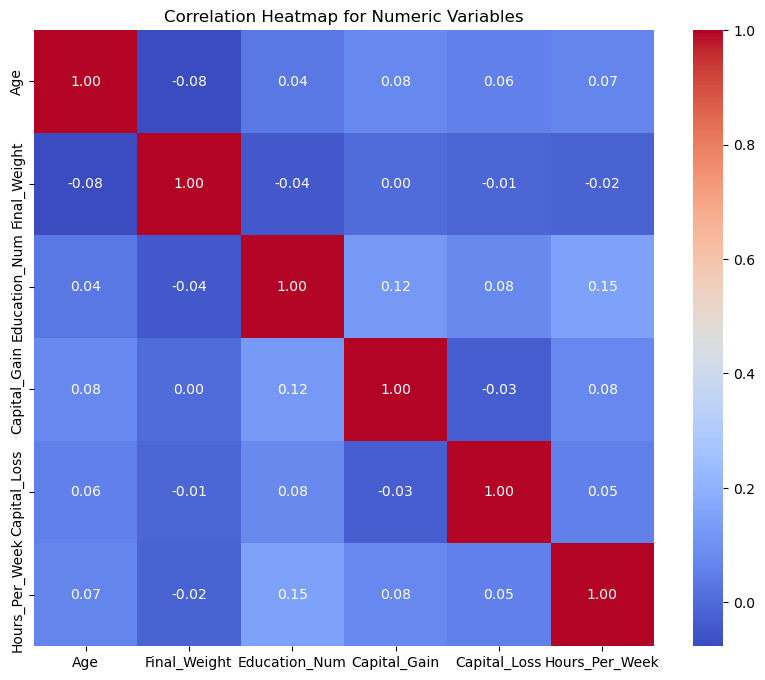

In [61]:
numeric_columns = income.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = income[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Variables')
plt.show()


In [62]:
correlation_matrix = income[numeric_columns].corr()
correlation_matrix

,Age,Final_Weight,Education_Num,Capital_Gain,Capital_Loss,Hours_Per_Week
Age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
Final_Weight,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
Education_Num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
Capital_Gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
Capital_Loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
Hours_Per_Week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


    TAKE AWAY:
    • As age increases, final weight decreases slightly (Weak negative correlation).
    • Final weight and education number have a weak negative correlation (Small negative correlation).
    • Higher education numbers correlate with higher capital gains ( Moderate positive correlation).
    • Capital gain and capital loss have a weak negative correlation ( Small negative correlation).
    • Capital gain and hours per week have a moderate positive correlation (Moderate positive correlation).
    • Hours per week and age have a weak positive correlation (Small positive correlation).

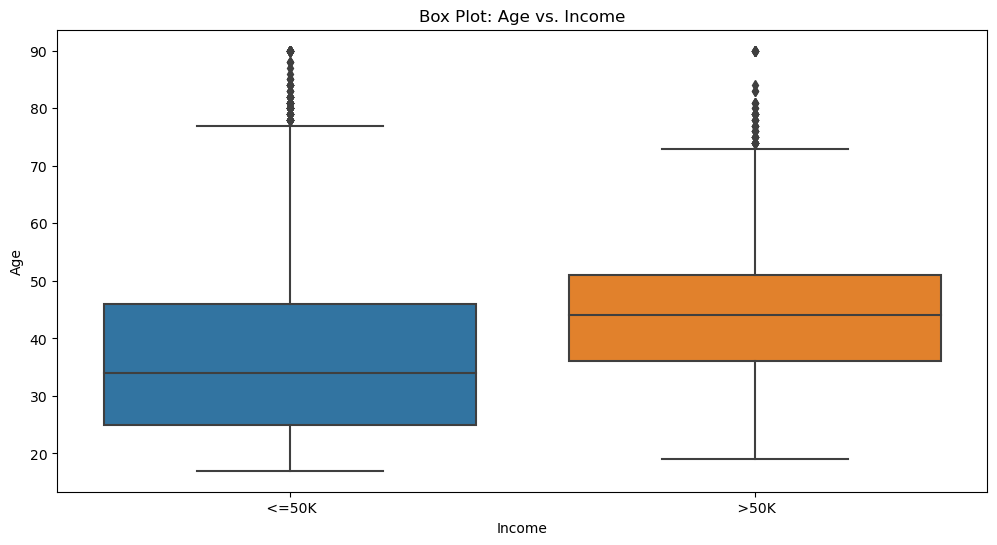

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income', y='Age', data=income)
plt.title('Box Plot: Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


- there are many outliers in both case
- income <=50K : outliers above 75
- income >50K :outliers above 70

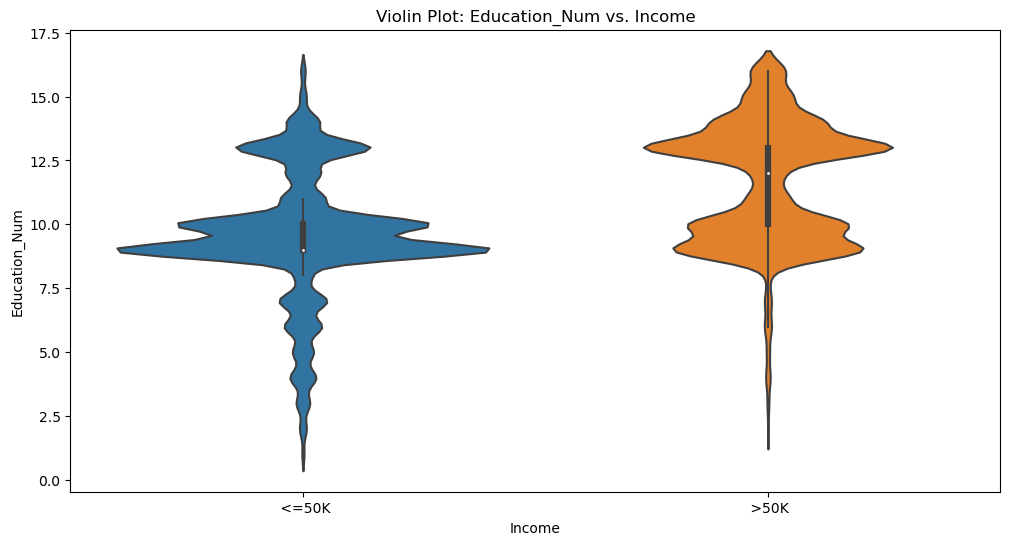

In [64]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Income', y='Education_Num', data=income)
plt.title('Violin Plot: Education_Num vs. Income')
plt.xlabel('Income')
plt.ylabel('Education_Num')
plt.show()

individuals from education number from 7 to 15 have income <+50K and >50K more.

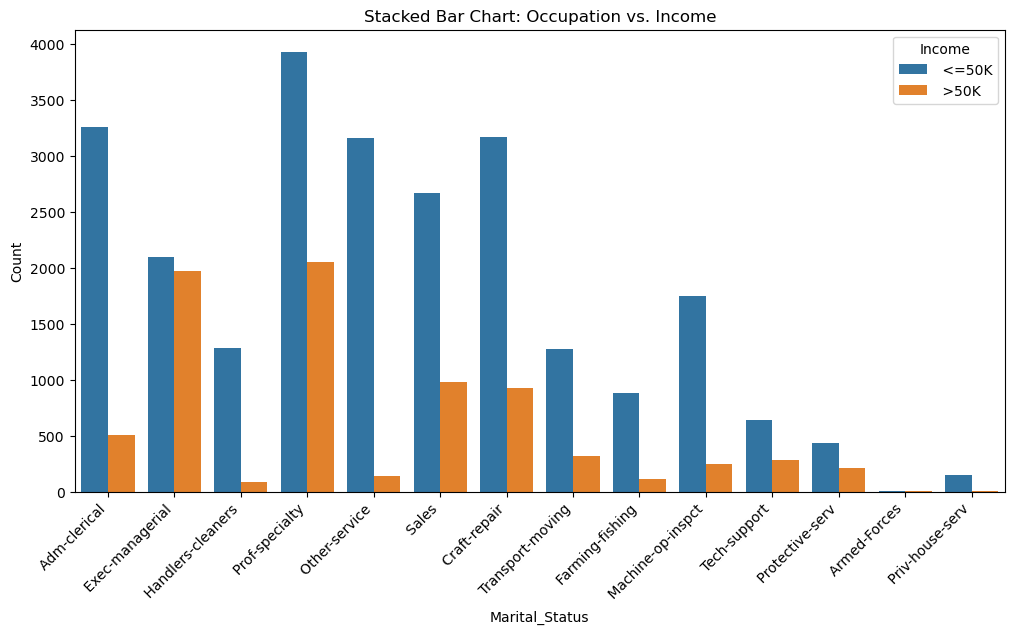

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(data=income, x='Occupation', hue='Income')
plt.title('Stacked Bar Chart: Occupation vs. Income')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- Professor speciality have income <50k and >50k more. 

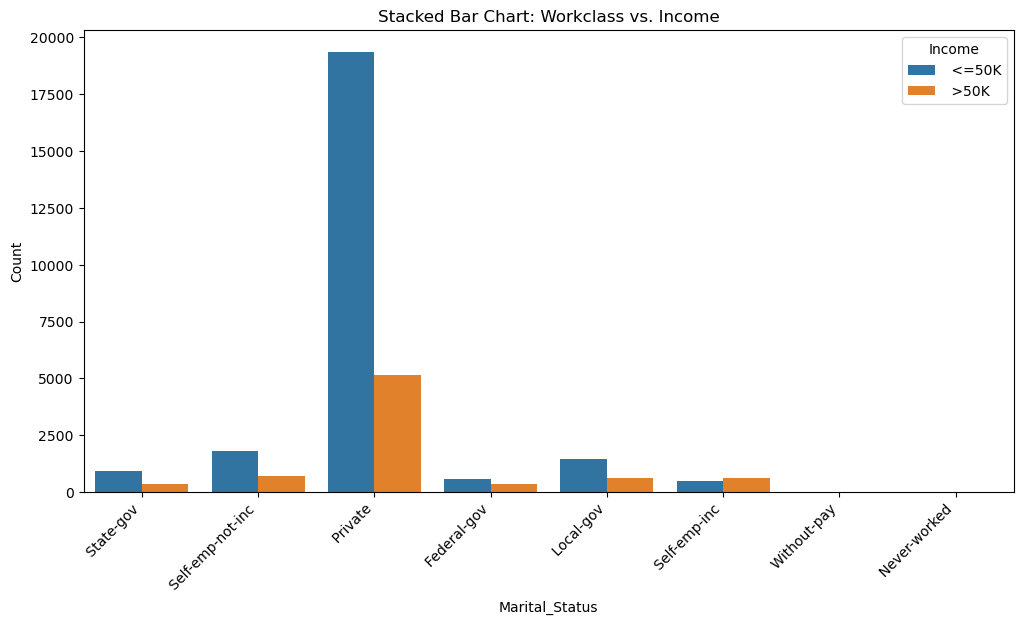

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(data=income, x='Workclass', hue='Income')
plt.title('Stacked Bar Chart: Workclass vs. Income')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- private sector is more in both income cases

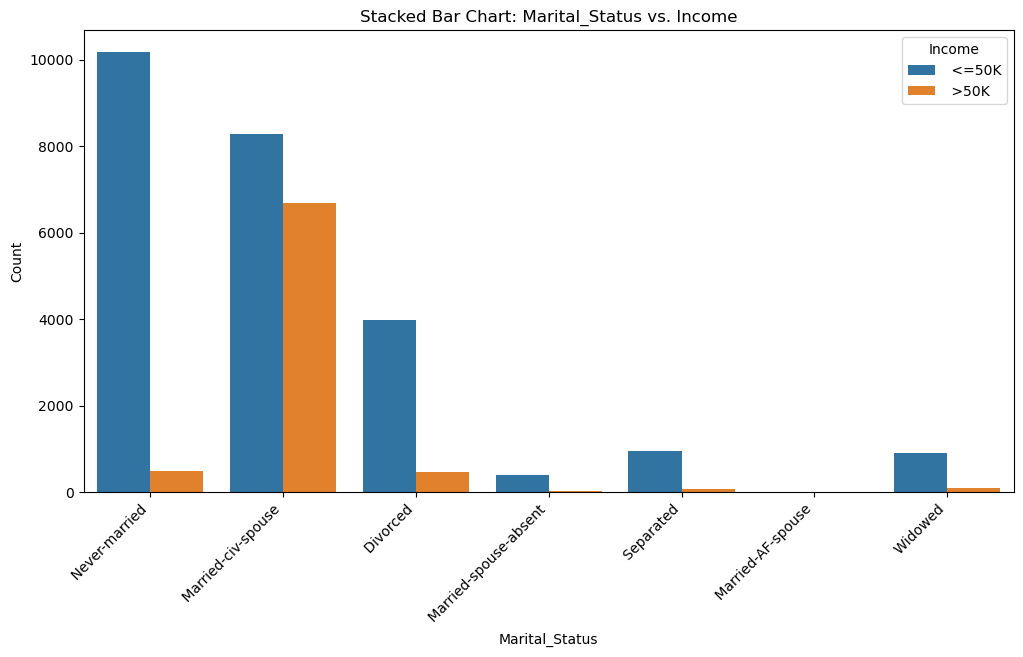

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(data=income, x='Marital_Status', hue='Income')
plt.title('Stacked Bar Chart: Marital_Status vs. Income')
plt.xlabel('Marital_Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

- Never married individuals have income <=50K more and Married Civilian Spouse have income >50K more.

### MODEL TRAINING

In [68]:
income.dtypes

Age                int64
Workclass         object
Final_Weight       int64
Education         object
Education_Num      int64
Marital_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_Per_Week     int64
Native_Country    object
Income            object
dtype: object

In [69]:
income.sample(5)

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
12323,30,Federal-gov,356689,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,30,Japan,<=50K
18658,25,Private,378322,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,2001,50,United-States,<=50K
13221,47,Self-emp-not-inc,166894,Some-college,10,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,<=50K
1160,44,Private,193459,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,3411,0,40,United-States,<=50K
28920,38,Private,87282,Assoc-voc,11,Never-married,Exec-managerial,Other-relative,Asian-Pac-Islander,Female,0,0,40,United-States,<=50K


In [70]:
income_df = income.copy()

#### CONVERTING CATEGORICAL DATAS TO NUMERICAL DATA USING FEATURE ENCODING(LABEL ENCODER)

In [71]:
label_encoder = LabelEncoder()

In [72]:
categorical_cols = income.select_dtypes(include='object').columns


In [73]:
for col in categorical_cols:
        income[col] = label_encoder.fit_transform(income[col])



#### SEPARATE INDEPENDENT VARIABLE (X) AND TARGET (y) VARIABLE

    target variable : income
    Here,
    X: independent variable
    y: dependent variable(target)

In [74]:
X = income.drop(columns=["Income","Final_Weight","Education"],axis=1)
y = income["Income"]

In [75]:
# final_weight is related to population censes
# education and education number represents same details
# hence i remove these columns

In [76]:
X

,Age,Workclass,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country
0,39,6,13,4,0,1,4,1,2174,0,40,38
1,50,5,13,2,3,0,4,1,0,0,13,38
2,38,3,9,0,5,1,4,1,0,0,40,38
3,53,3,7,2,5,0,2,1,0,0,40,38
4,28,3,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,12,2,12,5,4,0,0,0,38,38
32557,40,3,9,2,6,0,4,1,0,0,40,38
32558,58,3,9,6,0,4,4,0,0,0,40,38
32559,22,3,9,4,0,3,4,1,0,0,20,38


In [77]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32537, dtype: int32

#### SPLIT THE DATASET INTO TRAINING SETS AND TESTING SETS

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### TREATING IMBALANCED DATA

**Resampling:**  A widely adopted technology for dealing with highly unbalanced datasets.

In [79]:
income["Income"].value_counts()

0    24698
1     7839
Name: Income, dtype: int64

In [80]:
# It seems that the data is unbalanced.Hence to imbalance them use `SMOTE`

##### SMOTE(Synthetic Minority Oversampling Technique)

SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


#### APPLYING SMOTE

In [81]:
smote = SMOTE(random_state=42)


In [82]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [83]:
income.sample(5)

,Age,Workclass,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_Per_Week,Native_Country,Income
22487,39,3,123983,9,13,0,11,1,1,1,0,0,40,2,0
5175,42,5,99185,15,10,2,3,0,4,1,0,0,40,38,1
22271,56,5,66356,15,10,2,4,0,4,1,0,0,50,38,0
14050,25,3,273876,9,13,4,11,1,4,1,0,0,65,38,0
29978,27,6,291196,9,13,4,9,1,2,1,0,0,40,38,0


In [84]:
print("SHAPE OF ORGINAL DATASET: ",len(income))
print("SHAPE OF RESAMPLED DATASET: ",len(y_train_smote))

SHAPE OF ORGINAL DATASET:  32537
SHAPE OF RESAMPLED DATASET:  39586


In [85]:
# now the dataset is balanced for machine learing model implementation

#### STANDARDIZATION

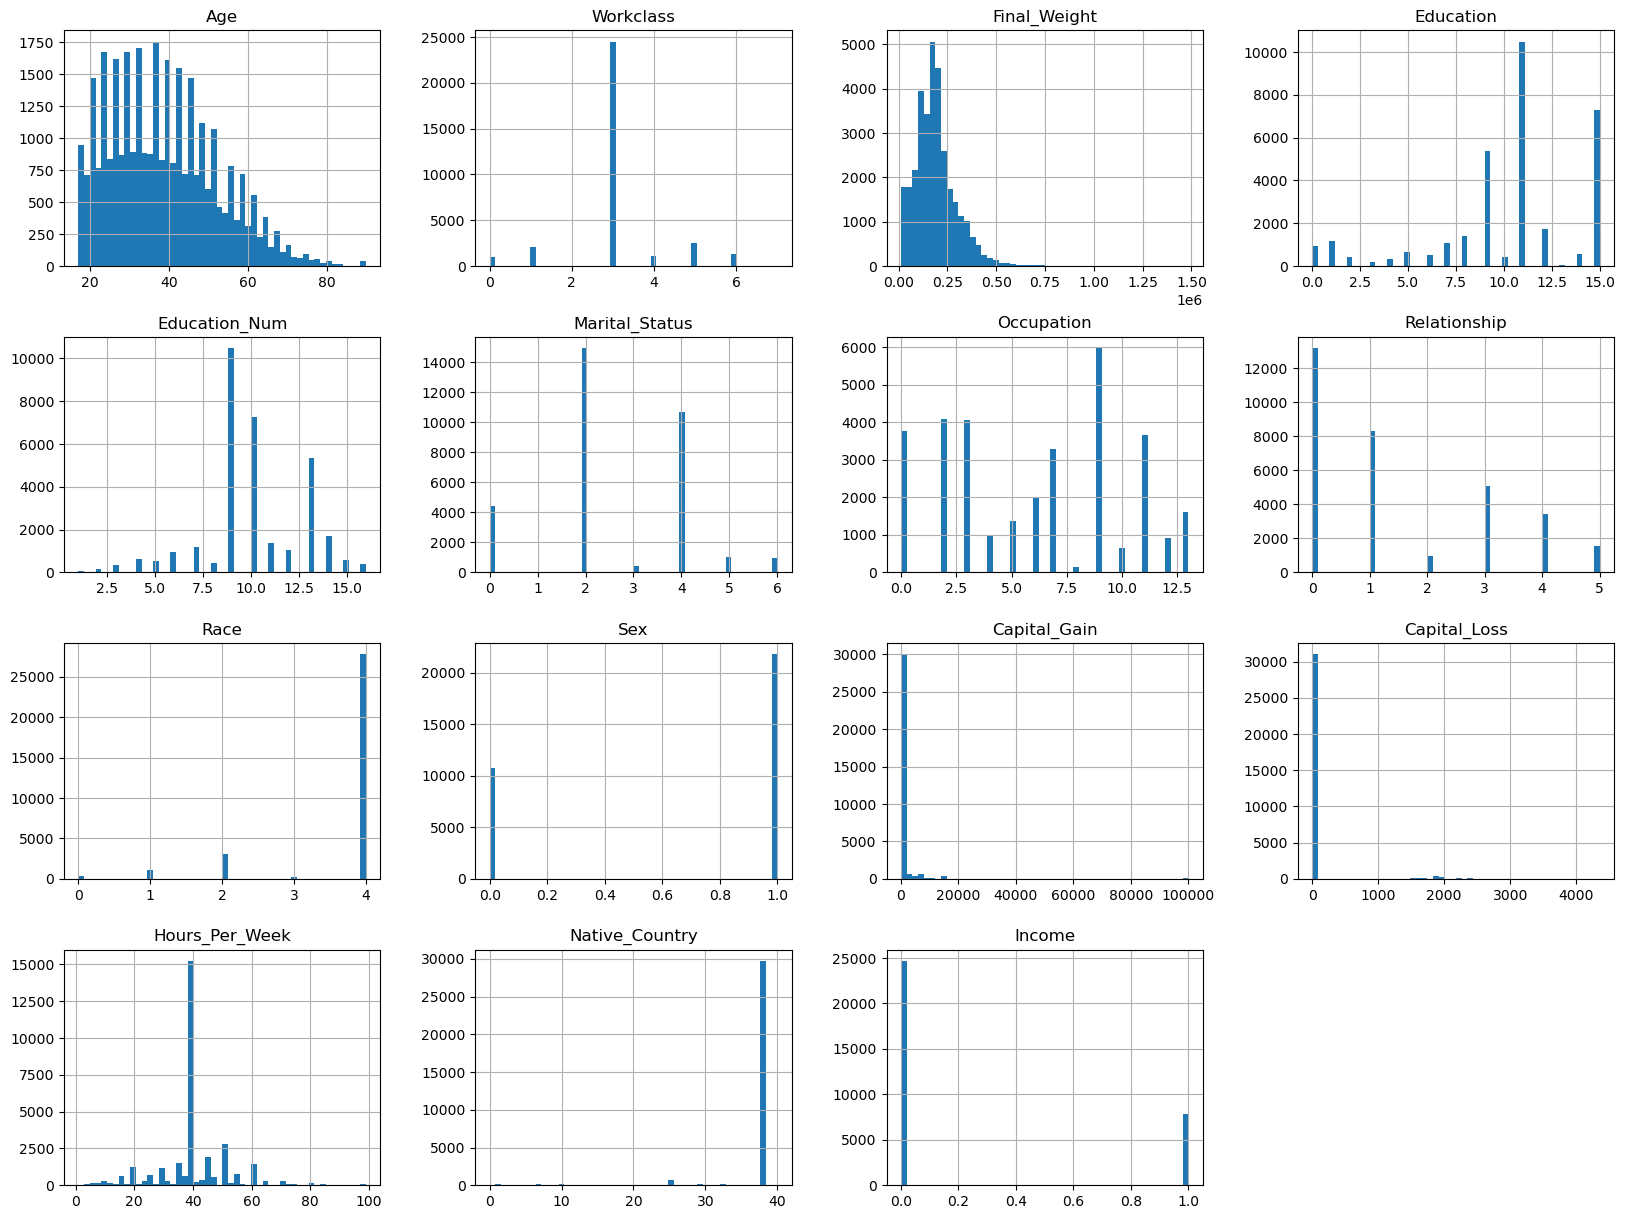

In [86]:
income.hist(bins = 50,figsize=(20,15))
plt.show()

In [87]:
# looks like that values are scattered,so while scale them they end up ranging from 0 to 1

##### SCALE DATA USING STANDARDSCALER

In [88]:
scaler = StandardScaler()

In [89]:
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [90]:
X_train_smote_scaled

array([[-0.34093217, -0.02906276, -0.6043569 , ..., -0.26421361,
        -0.33879113,  0.2505935 ],
       [ 0.9092097 , -0.02906276, -0.6043569 , ..., -0.26421361,
        -0.1728805 ,  0.2505935 ],
       [-0.49719991, -0.02906276, -0.20580835, ..., -0.26421361,
        -0.1728805 ,  0.2505935 ],
       ...,
       [-0.57533377, -0.02906276, -0.6043569 , ..., -0.26421361,
         3.47715332,  0.2505935 ],
       [ 0.36227263, -0.02906276, -0.20580835, ..., -0.26421361,
        -0.1728805 ,  0.2505935 ],
       [-0.57533377, -0.95314196,  0.59128874, ..., -0.26421361,
        -0.58765707,  0.2505935 ]])

In [91]:
X_test_scaled

array([[-0.73160151,  2.74317483,  0.1927402 , ..., -0.26421361,
        -0.1728805 ,  0.2505935 ],
       [-1.27853858, -2.80130036,  0.98983729, ..., -0.26421361,
        -0.1728805 ,  0.2505935 ],
       [ 1.53428064, -1.87722116, -0.20580835, ..., -0.26421361,
         1.48622578, -1.27261719],
       ...,
       [ 0.2060049 ,  1.81909563, -0.6043569 , ..., -0.26421361,
        -1.00243364,  0.2505935 ],
       [-0.65346764, -1.87722116, -0.6043569 , ..., -0.26421361,
        -0.1728805 ,  0.2505935 ],
       [ 0.4404065 , -2.80130036,  0.98983729, ..., -0.26421361,
        -0.1728805 ,  0.2505935 ]])

### MACHINE LEARNING (ML) MODEL IMPLEMENTATION

#### ML-1: LOGISTIC REGRESSION

In [92]:
logistic_reg = LogisticRegression()
logistic_reg

LogisticRegression()

##### Fit Logistic Regression model

In [93]:
logistic_reg.fit(X_train_smote_scaled, y_train_smote)


LogisticRegression()

##### Make predictions on the test set

In [94]:
y_predict = logistic_reg.predict(X_test_scaled)


In [95]:
y_predict

array([0, 1, 1, ..., 0, 0, 1])

##### EVALUATION METRICES

In [96]:
logistic_accuracy = accuracy_score(y_test, y_predict)
logistic_accuracy

0.7650583896742471

In [97]:
logistic_precision = precision_score(y_test, y_predict)
logistic_precision

0.5149193548387097

In [98]:
logistic_recall = recall_score(y_test,y_predict)
logistic_recall

0.7966313162819713

In [99]:
logistic_f1score = f1_score(y_test,y_predict)
logistic_f1score

0.6255204506490326

In [100]:
logistic_roc_auc = roc_auc_score(y_test,y_predict)
logistic_roc_auc

0.7756856887220254

#### ML-2: DECISION TREE REGRESSION

##### Fit decision tree Regression model

In [101]:
decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [102]:
decision_tree.fit(X_train_smote_scaled, y_train_smote)


DecisionTreeClassifier(criterion='entropy', max_depth=4)

##### Predictions on the Test set

In [103]:
predict_tree = decision_tree.predict(X_test_scaled)
predict_tree

array([1, 0, 1, ..., 1, 1, 1])

##### EVALUATION METRICES

In [104]:
decision_accuracy = accuracy_score(y_test,predict_tree)
decision_accuracy

0.7035955746773203

In [105]:
decision_precision = precision_score(y_test,predict_tree)
decision_precision

0.4492843808338519

In [106]:
decision_recall = recall_score(y_test,predict_tree)
decision_recall

0.9008109794135996

In [107]:
decision_f1score = f1_score(y_test,predict_tree)
decision_f1score

0.5995432842017854

In [108]:
decision_roc_auc = roc_auc_score(y_test,predict_tree)
decision_roc_auc

0.7699773551502248

#### ML-3: K-NEAREST NEIGHBORS (KNN)

##### Fit KNN model

In [109]:
knn = KNeighborsClassifier(n_neighbors=7)

In [110]:
knn.fit(X_train_smote_scaled, y_train_smote)

KNeighborsClassifier(n_neighbors=7)

##### Predictions on the Test set

In [111]:
predict_knn = knn.predict(X_test_scaled)

In [112]:
predict_knn

array([0, 0, 1, ..., 0, 1, 1])

##### EVALUATION METRICES

In [113]:
knn_accuracy = accuracy_score(y_test, predict_knn)
knn_accuracy

0.8030116779348494

In [114]:
knn_precision = precision_score(y_test, predict_knn)
knn_precision

0.5763921941932413

In [115]:
knn_recall = recall_score(y_test, predict_knn)
knn_recall

0.7554585152838428

In [116]:
knn_f1_score = f1_score(y_test, predict_knn)
knn_f1_score

0.6538876889848813

In [117]:
knn_roc_auc = roc_auc_score(y_test, predict_knn)
knn_roc_auc

0.7870055063677113

#### PRINT EVALUATION METRICES OF DIFFERENT MACHINE LEARNING MODELS

In [118]:
print("EVALUATION METRICES OF LOGISTIC REGRESSION")
print("=============================================")
print("ACCURACY SCORE OF LOGISTIC REGRESSION:",logistic_accuracy)
print("PRECISION SCORE OF LOGISTIC REGRESSION :",logistic_precision)
print("RECALL SCORE OF LOGISTIC REGRESSION:",logistic_recall)
print("F1_SCORE OF LOGISTIC REGRESSION:",logistic_f1score)
print("ROC_AUC SCORE OF LOGISTIC REGRESSION:",logistic_roc_auc)
print("**************************************")
print("                                                                                                ")
print("EVALUATION METRICES OF DECISION REGRESSION")
print("=============================================")
print("ACCURACY SCORE OF DECISION REGRESSION :",decision_accuracy)
print("PRECISION SCORE OF DECISION REGRESSION :",decision_precision)
print("RECALL SCORE OF DECISION REGRESSION :",decision_recall)
print("F1_SCORE OF DECISION REGRESSION :",decision_f1score)
print("ROC_AUC SCORE OF DECISION REGRESSION :",decision_roc_auc)
print("**************************************")
print("                                                                                                ")
print("EVALUATION METRICS OF K-NEAREST NEIGHBORS (KNN)")
("===============================================")
print("ACCURACY SCORE OF KNN:", knn_accuracy)
print("PRECISION SCORE OF KNN:", knn_precision)
print("RECALL SCORE OF KNN:", knn_recall)
print("F1_SCORE OF KNN:", knn_f1_score)
print("ROC_AUC SCORE OF KNN:", knn_roc_auc)
print("**************************************")



EVALUATION METRICES OF LOGISTIC REGRESSION
ACCURACY SCORE OF LOGISTIC REGRESSION: 0.7650583896742471
PRECISION SCORE OF LOGISTIC REGRESSION : 0.5149193548387097
RECALL SCORE OF LOGISTIC REGRESSION: 0.7966313162819713
F1_SCORE OF LOGISTIC REGRESSION: 0.6255204506490326
ROC_AUC SCORE OF LOGISTIC REGRESSION: 0.7756856887220254
**************************************
                                                                                                
EVALUATION METRICES OF DECISION REGRESSION
ACCURACY SCORE OF DECISION REGRESSION : 0.7035955746773203
PRECISION SCORE OF DECISION REGRESSION : 0.4492843808338519
RECALL SCORE OF DECISION REGRESSION : 0.9008109794135996
F1_SCORE OF DECISION REGRESSION : 0.5995432842017854
ROC_AUC SCORE OF DECISION REGRESSION : 0.7699773551502248
**************************************
                                                                                                
EVALUATION METRICS OF K-NEAREST NEIGHBORS (KNN)
ACCURACY SCORE OF KNN: 0

### CONCLUSIONS


- The K-Nearest Neighbors (KNN) model outperforms both Logistic Regression and Decision Tree Regression in terms of accuracy, precision, recall, F1-Score, and ROC-AUC.
- Decision Tree Regression has high recall but lower precision compared to the other models, indicating it may be better at identifying positive cases but may have more false positives.
- Logistic Regression strikes a balance between precision and recall, but KNN performs better overall in terms of accuracy and F1-Score.

**Based on the provided evaluation metrics, the K-Nearest Neighbors (KNN) model appears to be the most suitable for predicting whether an individual earns more than $50,000 or not.**








